In [4]:
import ee
ee.Authenticate()


Successfully saved authorization token.


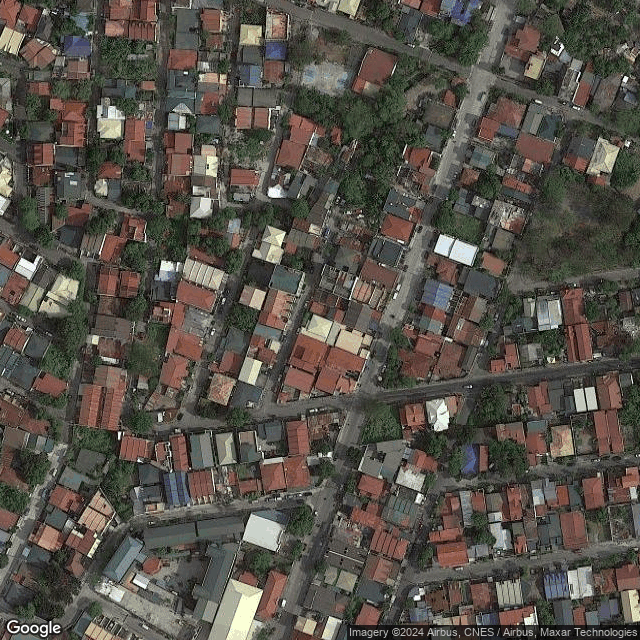

In [12]:
import os
from IPython.display import Image, display

dir_path = '/raid/students/michel/capstone/lamudi/houselots/'
file_name = 'HO64C8F62C11F2CPH_18.png'
image_path = dir_path+file_name
image = Image(filename=image_path)
display(image)

latitude = 14.455671
longitude = 120.981053

In [13]:
import ee
import geemap

def download_sentinel2_data(latitude, longitude, date_start, date_end, output_filename):
    """
    Downloads Sentinel-2 data for specified location and date range, including RGB, NIR, SWIR, and RedEdge bands.

    :param latitude: Latitude of the location.
    :param longitude: Longitude of the location.
    :param date_start: Start date for the image collection in 'YYYY-MM-DD' format.
    :param date_end: End date for the image collection in 'YYYY-MM-DD' format.
    :param output_filename: File path for the output image.
    """
    try:
        # Initialize the Earth Engine library.
        ee.Initialize()

        # Define the area of interest.
        location = ee.Geometry.Point(longitude, latitude)

        # Load the Sentinel-2 ImageCollection.
        collection = ee.ImageCollection('COPERNICUS/S2')\
            .filterBounds(location)\
            .filterDate(ee.Date(date_start), ee.Date(date_end))\
            .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 15))\
            .sort('CLOUD_COVER', True)

        # Select the first image from the collection.
        image = collection.first()

        # Define the bands to download.
        bands = ['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B11', 'B12']
        
        # Select the specific bands for the image.
        image = image.select(bands)

        # Specify visualization parameters.
        #vis_params = {
        #    'bands': ['B4', 'B3', 'B2'],
        #    'min': 0,
        #    'max': 3000,
        #    'gamma': 1.0
        #}

        # Use geemap to export the image.
        geemap.ee_export_image(image, filename=output_filename, scale=100, region=location.buffer(10000), file_per_band=False)

        print("Image downloaded successfully.")

    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
latitude = 14.455671
longitude = 120.981053
date_start = '2023-01-01'
date_end = '2023-12-31'
output_filename = 'sentinel2_image_single.tif'

download_sentinel2_data(latitude, longitude, date_start, date_end, output_filename)


Generating URL ...
Please wait ...
Data downloaded to /home/michel/capstone-test/sentinel2_image_single.tif
Image downloaded successfully.


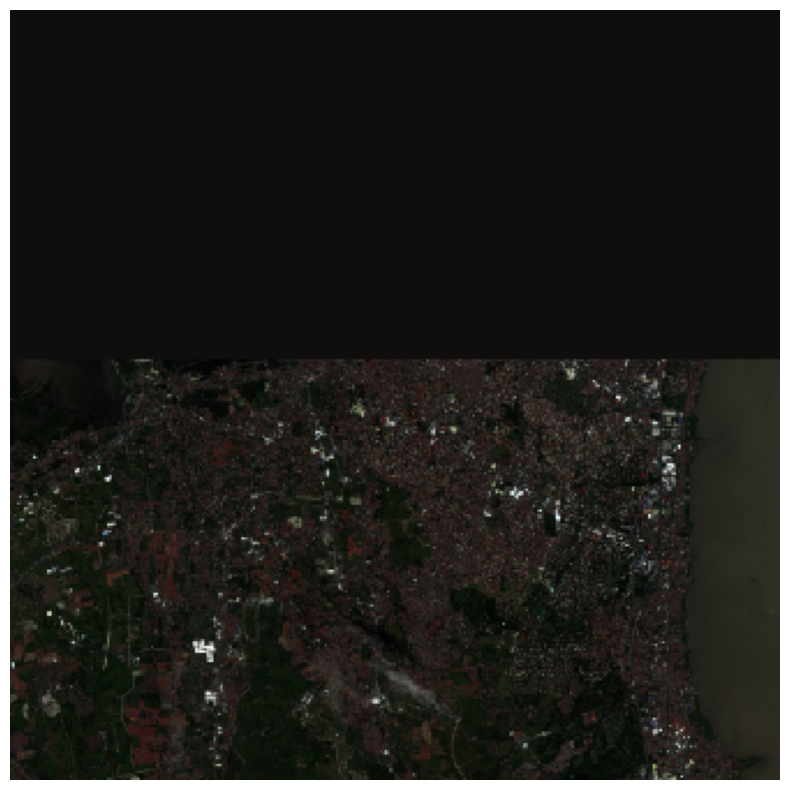

In [15]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# Function to normalize the bands
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return (array - array_min)/(array_max - array_min)

# Replace 'your_file.tif' with the path to your multi-band image file
file_path = 'sentinel2_image_single.tif'

# Open the multi-band image
with rasterio.open(file_path) as src:
    # Read the three bands (Red, Green, Blue)
    # Sentinel-2 band order is B2 (Blue), B3 (Green), B4 (Red)
    # Adjust the indices if your band order is different
    band_blue = src.read(1)
    band_green = src.read(2)
    band_red = src.read(3)

    # Normalize the bands to 0.0 - 1.0 scale
    red = normalize(band_red)
    green = normalize(band_green)
    blue = normalize(band_blue)

    # Stack bands
    rgb = np.dstack((red, green, blue))

# Plot the RGB composite image
plt.figure(figsize=(10, 10))
plt.imshow(rgb)
plt.axis('off')  # Remove axis
plt.show()
